In [9]:
import pandas as pd 
from datetime import datetime, timedelta
import pandas_datareader as pdr

In [10]:
%matplotlib inline
import numpy as np 
import math         
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)

In [15]:
# define time interval
end_time   = datetime.today() - timedelta(days=1)
start_time = datetime(end_time.year - 10, end_time.month, end_time.day)
sp500      = pdr.DataReader('^GSPC','yahoo',start_time,end_time)
sp500 = sp500.reset_index(level=0)
sp500

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-09-26,1441.599976,1430.530029,1441.599976,1433.319946,3565380000,1433.319946
1,2012-09-27,1450.199951,1433.359985,1433.359985,1447.150024,3150330000,1447.150024
2,2012-09-28,1447.130005,1435.599976,1447.130005,1440.670044,3509230000,1440.670044
3,2012-10-01,1457.140015,1440.900024,1440.900024,1444.489990,3505080000,1444.489990
4,2012-10-02,1451.520020,1439.010010,1444.989990,1445.750000,3321790000,1445.750000
...,...,...,...,...,...,...,...
2511,2022-09-20,3876.010010,3827.540039,3875.229980,3855.929932,4058050000,3855.929932
2512,2022-09-21,3907.070068,3789.489990,3871.399902,3789.929932,4078330000,3789.929932
2513,2022-09-22,3790.899902,3749.449951,3782.360107,3757.989990,4284600000,3757.989990
2514,2022-09-23,3727.139893,3647.469971,3727.139893,3693.229980,5144270000,3693.229980


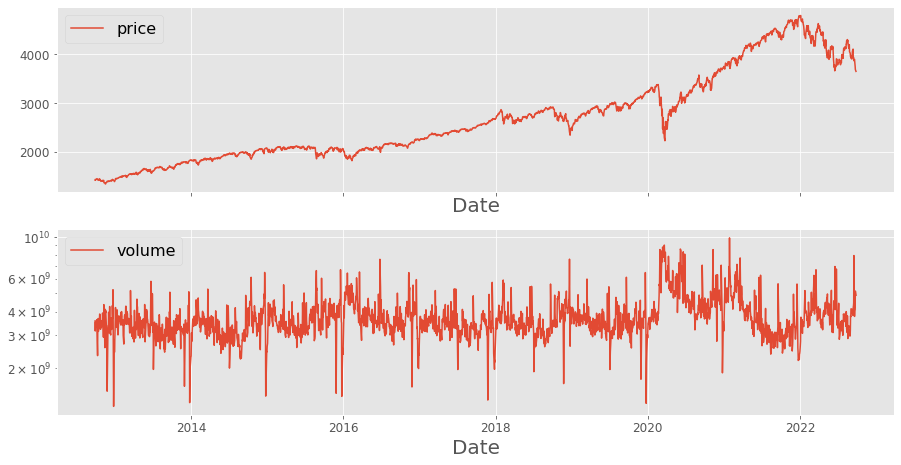

In [17]:
fig,[ax,bx]=plt.subplots(figsize=(15,7.5),nrows=2,sharex=True,subplot_kw={'xlabel':r'Date'})
ax.plot(sp500.Date, sp500.Close, label="price")
bx.plot(sp500.Date, sp500.Volume, label="volume")
bx.set_yscale('log')
ax.legend()    
bx.legend()
plt.show()

In [18]:
# Logarithmic return of price time series
def logreturn(Pt,tau=1):
    return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
# normalize data to have unit variance (<(x - <x>)^2> = 1)
def normalized(data):
    return (data/np.sqrt(np.var(data)))
# compute normalized probability distribution function
def pdf(data,bins=50):
    hist, edges = np.histogram(data[~np.isnan(data)], bins=bins, density=True) # remove NaNs and compute histogram (returns bar heights and bar edges)
    edges   = (edges[:-1] + edges[1:])/2.0 # get bar centers
    nonzero = hist > 0.0                   # only keep non-zero points 
    return edges[nonzero], hist[nonzero]
def computeReturn(data, name, tau):
    data[name]=pd.Series(normalized(logreturn(data['Close'].values, tau)),index=data.index[:-tau])

In [25]:
def plot_normalized_return_dist(ax, data, cols, labels):
    for col,lbl in zip(cols,labels):
        data[col].hist(ax=ax,alpha=0.6, density=True, bins=50, lw=0, label=lbl)
    ax.set_xlim([-5,5])
    ax.legend()
    ax.set_xlabel('Normalized price return $G_n(t)$')
    ax.set_ylabel('Probability Distribution')
    
def plot_pdf(ax, data, cols, labels):
    for col,lbl in zip(cols,labels):
        edges, hist = pdf(np.abs(data[col]), bins=20)
        ax.plot(edges, hist, label=lbl, lw=3)

    #plot gaussian
    x = np.logspace(-1, 1.2)
    ax.plot(x,np.abs(np.exp(-x**2/2)/np.sqrt(2*np.pi)),lw=6,ls='--',color='gray',alpha=0.8,label=r'Gaussian')
        
    ax.set_ylim(1e-4, 2e0)
    ax.set_xlim(1e-1, 2e1)
    ax.semilogx()
    ax.semilogy()
    ax.legend(loc=3)
    ax.set_xlabel(r'Absolute normalized price return $|G_n|$')
    ax.set_ylabel(r'Probability distribution')

In [26]:
cols,taus = ['G1','G30','G90','G180'], [1,30,90,180]
for col,tau in zip(cols,taus):
    computeReturn(sp500, col, tau)

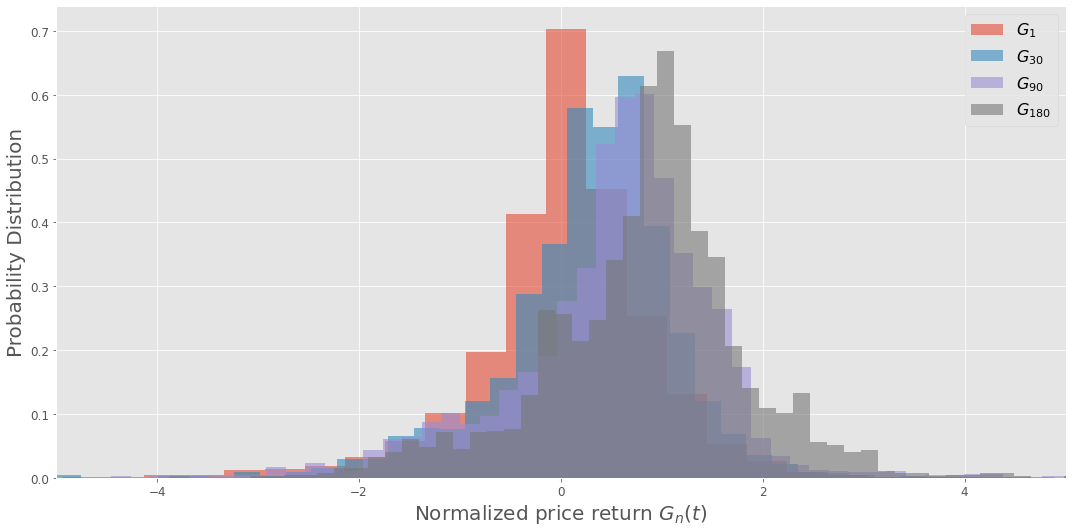

In [27]:
fig, axes = plt.subplots(figsize=(15.0,7.5))
plot_normalized_return_dist(axes, sp500, cols, [r'$G_{1}$', r'$G_{30}$', r'$G_{90}$', r'$G_{180}$'])
fig.tight_layout()
plt.show()

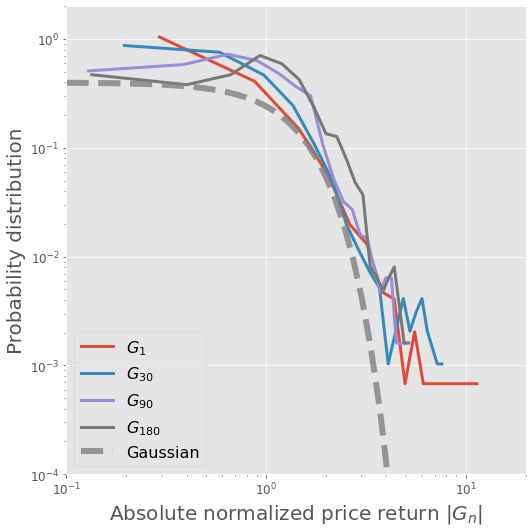

In [28]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
plot_pdf(ax, sp500, cols, [r'$G_{1}$', r'$G_{30}$', r'$G_{90}$', r'$G_{180}$'])
fig.tight_layout()
plt.show()